In [4]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)




In [5]:
def cv2_imshow(img):

    plt.figure(figsize=(15, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


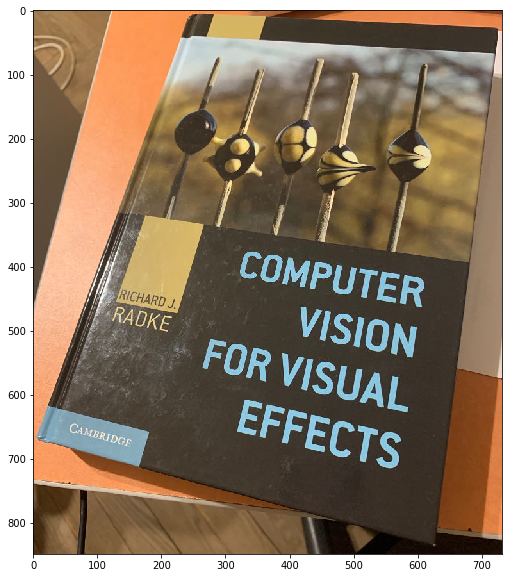

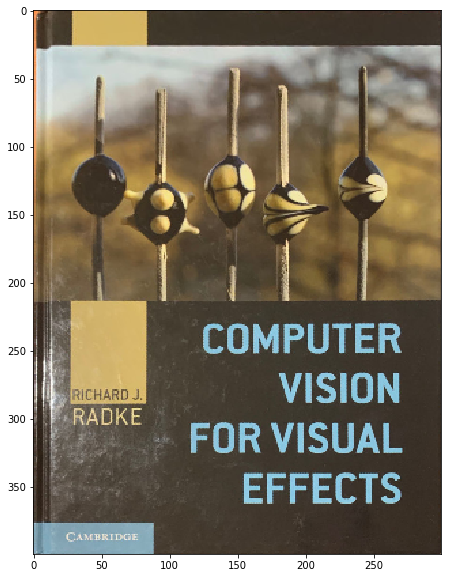

In [6]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
cv2_imshow(img)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])


# implement this function
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300, 400))
cv2_imshow(dst)



### implementation of the function

In [14]:
def getPerspectiveTransform(pts1, pts2):
    pts2 = -1 * pts2
    matrix_A = np.array([
            [pts1[0][0], pts1[0][1], 1, 0, 0, 0, 0, 0, 0, pts2[0][0], 0, 0, 0],
            [0, 0, 0, pts1[0][0], pts1[0][1], 1, 0, 0, 0, pts2[0][1], 0, 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[0][0], pts1[0][1], 1, -1, 0, 0, 0],
            [pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, 0, 0, 0, pts2[1][0], 0, 0],
            [0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, pts2[1][1], 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, -1, 0, 0],
            [pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, pts2[2][0], 0],
            [0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, pts2[2][1], 0],
            [0, 0, 0, 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, -1, 0],
            [pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, pts2[3][0]],
            [0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, pts2[3][1]],
            [0, 0, 0, 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, -1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        ])
    x = np.dot(np.linalg.inv(matrix_A),
               np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
    res = x[:9].reshape((3, 3)) / x[8]
    
    return res

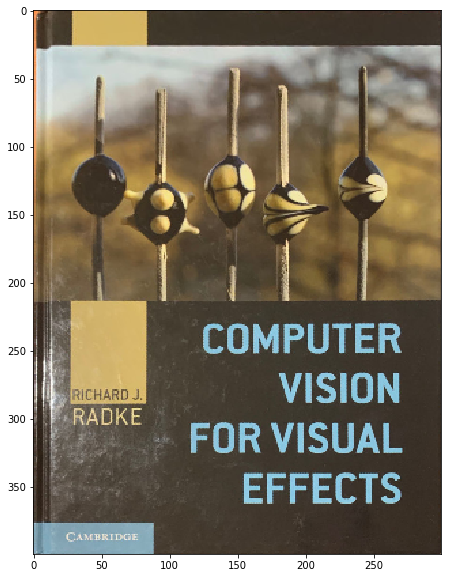

In [15]:
M = getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img,M,(300, 400))
cv2_imshow(dst)